In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.use('Agg')
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [26]:
heart = pd.read_csv("http://faculty.washington.edu/kenrice/heartgraphs/nhaneslarge.csv", sep=",", na_values=".")
heart.describe()

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR
count,1000.000000,1000.000000,905.000000,832.000000,1000.0000,1000.00000,991.000000,1000.000000
mean,119.932667,68.021000,68.333702,68.442308,409.2650,1.50000,27.077619,40.109000
std,17.996055,13.951905,14.371156,14.041936,242.0019,0.50025,6.552778,20.379363
min,82.000000,0.000000,0.000000,0.000000,0.0000,1.00000,14.240000,8.000000
25%,108.000000,60.000000,60.000000,60.000000,250.0000,1.00000,22.520000,21.750000
50%,117.333333,69.000000,68.000000,70.000000,354.0000,1.50000,26.550000,40.000000
75%,130.000000,77.000000,78.000000,78.000000,492.2500,2.00000,30.860000,54.000000
max,216.000000,112.000000,110.000000,114.000000,1906.0000,2.00000,57.410000,85.000000


# Univariate Plots: Folate intake by gender

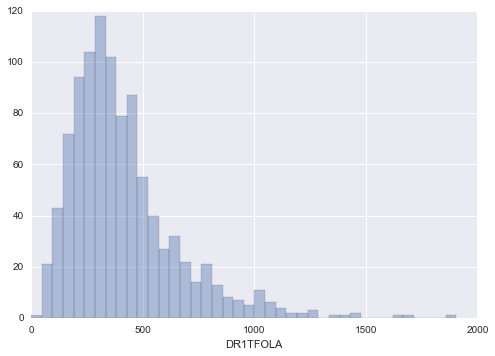

In [34]:
sns.distplot(heart["DR1TFOLA"], kde=False)

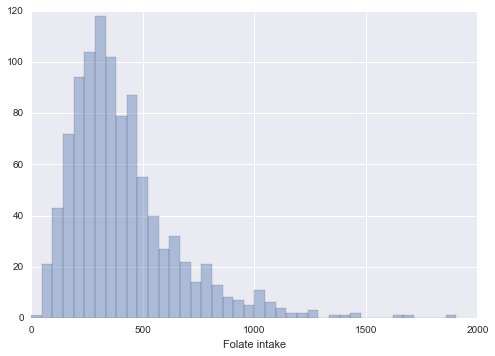

In [5]:
sns.distplot(heart["DR1TFOLA"], kde=False).\
    set(xlabel='Folate intake')


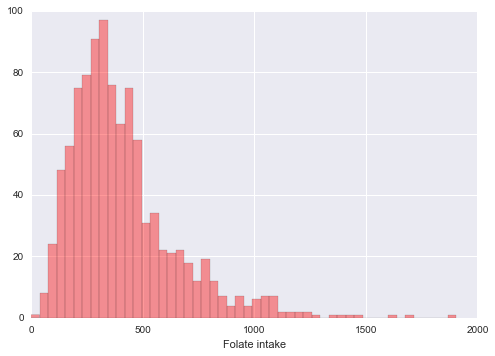

In [6]:
sns.distplot(heart["DR1TFOLA"], kde=False, bins=50, color='r').\
    set(xlabel='Folate intake')

[(0, 2500.0), <matplotlib.text.Text at 0x11bc31eb8>]

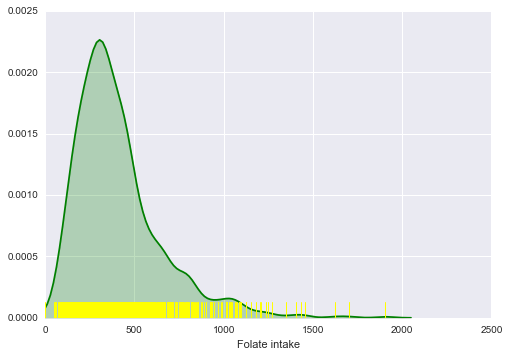

In [7]:
sns.distplot(heart["DR1TFOLA"], kde=True, hist=False, rug=True,
             kde_kws={"shade": True, "color": "green"},
             rug_kws={"color": "yellow"}).\
    set(xlabel='Folate intake', xlim=(0,None))

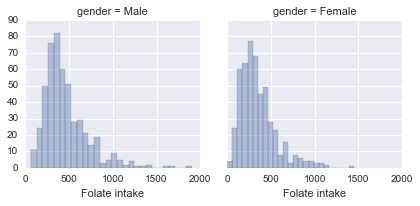

In [8]:
sns.FacetGrid(heart, col="gender", margin_titles=True).\
    map(sns.distplot, "DR1TFOLA", kde=False).\
    set(xlabel='Folate intake')

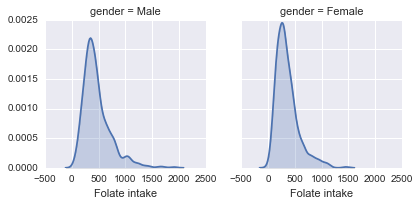

In [9]:
sns.FacetGrid(heart, col="gender", margin_titles=True).\
    map(sns.distplot, "DR1TFOLA", kde=True, hist=False, kde_kws={"shade": True}).\
    set(xlabel='Folate intake')

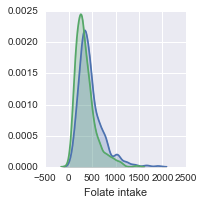

In [10]:
sns.FacetGrid(heart, hue="gender", margin_titles=True).\
    map(sns.distplot, "DR1TFOLA", kde=True, hist=False, kde_kws={"shade": True}).\
    set(xlabel='Folate intake')

# Univariate Plots: Systolic blood pressure by gender

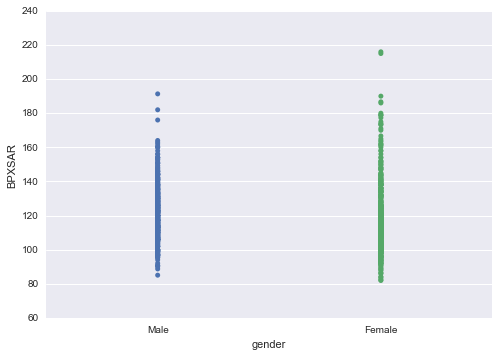

In [11]:
sns.stripplot(x="gender", y="BPXSAR", data=heart)

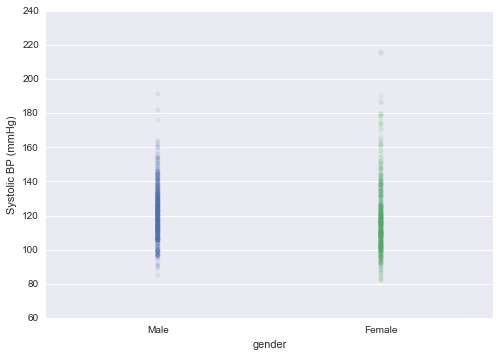

In [12]:
sns.stripplot(x="gender", y="BPXSAR", data=heart, alpha=0.1).\
    set(ylabel="Systolic BP (mmHg)")

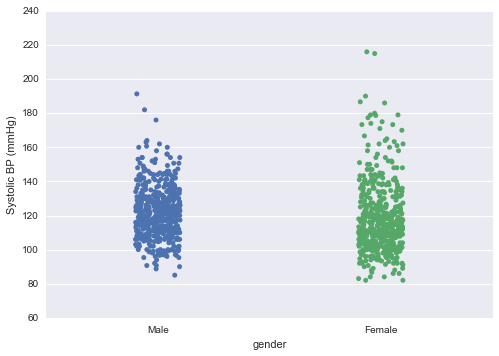

In [13]:
sns.stripplot(x="gender", y="BPXSAR", data=heart, jitter=True).\
    set(ylabel="Systolic BP (mmHg)")

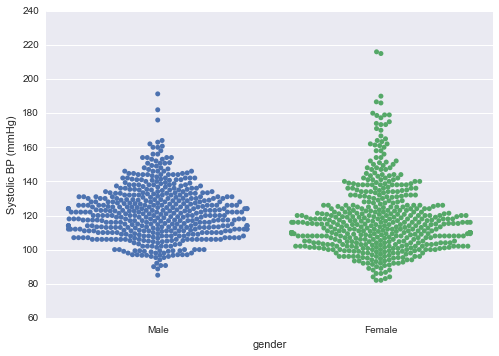

In [14]:
sns.swarmplot(x="gender", y="BPXSAR", data=heart).\
    set(ylabel="Systolic BP (mmHg)")

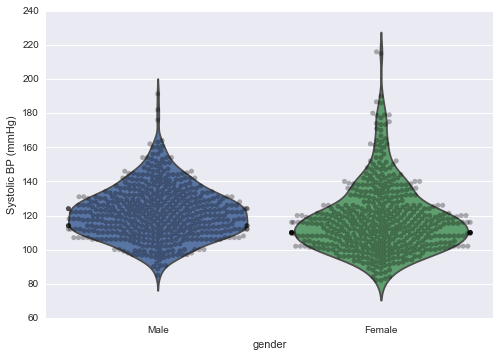

In [15]:
sns.violinplot(x="gender", y="BPXSAR", data=heart, inner=None)
sns.swarmplot(x="gender", y="BPXSAR", data=heart, color="black", alpha=0.3).\
    set(ylabel="Systolic BP (mmHg)")

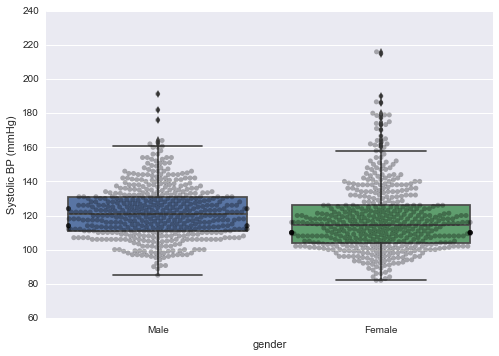

In [16]:
sns.boxplot(x="gender", y="BPXSAR", data=heart)
sns.swarmplot(x="gender", y="BPXSAR", data=heart, color="black", alpha=0.3).\
    set(ylabel="Systolic BP (mmHg)")

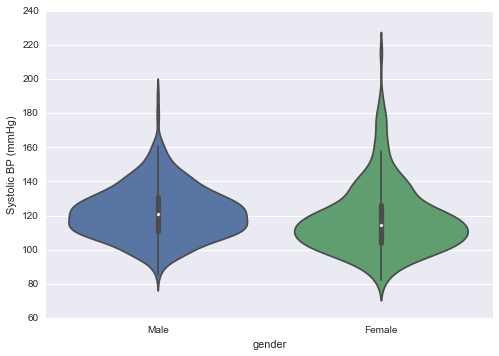

In [17]:
sns.violinplot(x="gender", y="BPXSAR", data=heart, inner="box").\
    set(ylabel="Systolic BP (mmHg)")

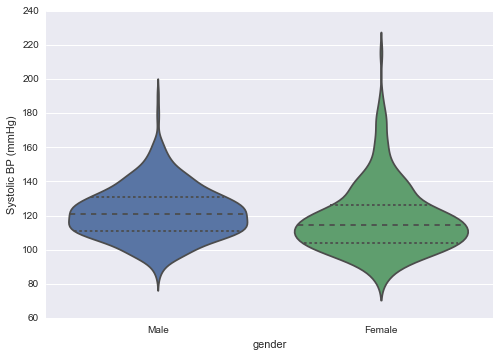

In [18]:
sns.violinplot(x="gender", y="BPXSAR", data=heart, inner="quartile").\
    set(ylabel="Systolic BP (mmHg)")

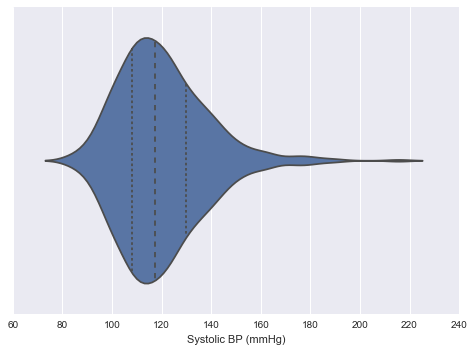

In [19]:
sns.violinplot(x="BPXSAR", data=heart, inner="quartile").\
    set(xlabel="Systolic BP (mmHg)")

# Bivariate Plots: Age & Systolic Blood Pressure

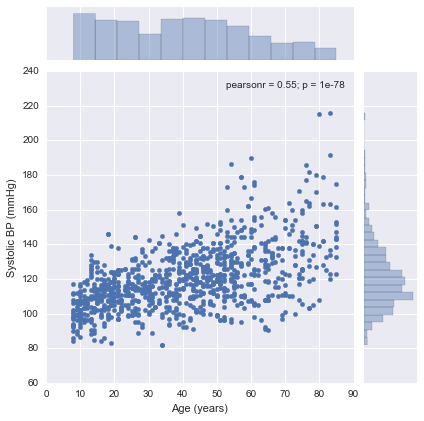

In [20]:
sns.jointplot(x="RIDAGEYR", y="BPXSAR", data=heart, kind="scatter").\
    set_axis_labels("Age (years)", "Systolic BP (mmHg)")

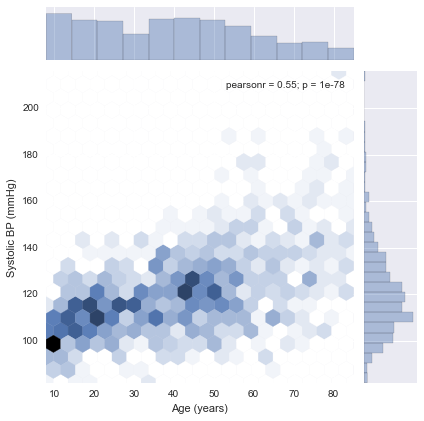

In [21]:
sns.jointplot(x="RIDAGEYR", y="BPXSAR", data=heart, kind="hex").\
    set_axis_labels("Age (years)", "Systolic BP (mmHg)")

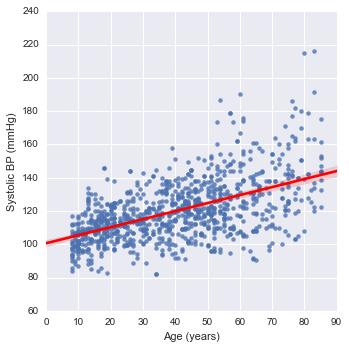

In [22]:
sns.lmplot(x="RIDAGEYR", y="BPXSAR", data=heart, line_kws={'color': 'red'}, ci=95).\
    set_axis_labels("Age (years)", "Systolic BP (mmHg)")

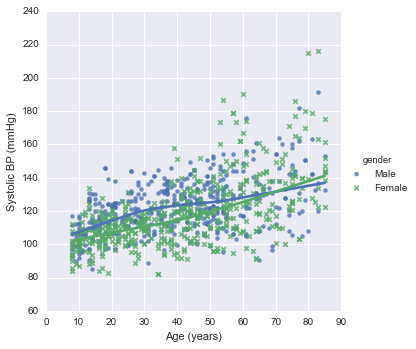

In [23]:
sns.lmplot(x="RIDAGEYR", y="BPXSAR", data=heart, hue="gender", markers=["o", "x"], x_ci=95, lowess=True).\
    set_axis_labels("Age (years)", "Systolic BP (mmHg)")

# lowess?

# Multivariable Plots: Body Mass Index & Systolic BP, by gender and age

Let's bin the data

In [24]:
heart = heart.assign(age_cat = pd.cut(heart['RIDAGEYR'],[0,30,55,100]).astype('category'))
heart.head()

,BPXSAR,BPXDAR,BPXDI1,BPXDI2,race_ethc,gender,DR1TFOLA,RIAGENDR,BMXBMI,RIDAGEYR,age_cat
0,108.000000,56.000000,56.0,58.0,Other,Male,434,1,25.83,65,"(55, 100]"
1,117.333333,60.000000,56.0,64.0,Hispanic,Male,241,1,25.73,74,"(55, 100]"
2,120.000000,82.666667,80.0,86.0,White non-Hispanic,Male,380,1,24.49,54,"(30, 55]"
3,88.000000,52.000000,52.0,NaN,White non-Hispanic,Female,152,2,20.76,9,"(0, 30]"
4,150.666667,96.000000,100.0,94.0,Black non-Hispanic,Male,422,1,24.63,49,"(30, 55]"


In [25]:
sns.FacetGrid(heart, col="age_cat", margin_titles=True)\
    .map(plt.scatter, x="BMXBMI", y="BPXSAR")

ValueError: could not convert string to float: 'BMXBMI'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1148690d0> (for post_execute):


ValueError: could not convert string to float: 'BMXBMI'

ValueError: could not convert string to float: 'BMXBMI'